In [1]:
!pip install -r requirements.txt --quiet --upgrade

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.16.2 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.0.0 which is incompatible.


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import time
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
%matplotlib inline
plt.rcParams['figure.figsize'] =  (22,5)
plt.rcParams['font.size'] = 14

In [3]:
symbol = 'GOOGL'
df = yf.Ticker(symbol).history(period='max').reset_index()
df['Date'] = df['Date'].dt.date
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.499634,2.601119,2.398648,2.508132,893181924,0.0,0.0
1,2004-08-20,2.524880,2.726600,2.512132,2.707353,456686856,0.0,0.0
2,2004-08-23,2.768345,2.836584,2.725851,2.734599,365122512,0.0,0.0
3,2004-08-24,2.780593,2.789591,2.588871,2.621365,304946748,0.0,0.0
4,2004-08-25,2.623616,2.699605,2.596620,2.649612,183772044,0.0,0.0


In [5]:
df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,5004,2014-07-27 01:47:03.021582592,2004-08-19 00:00:00,2009-08-06 18:00:00,2014-07-28 12:00:00,2019-07-17 06:00:00,2024-07-08 00:00:00,NaN
Open,5004.0,44.818771,2.479387,13.046463,27.504183,60.146346,189.919998,42.293931
High,5004.0,45.289205,2.543127,13.184194,27.722934,60.651893,190.860001,42.76398
Low,5004.0,44.35893,2.398648,12.907483,27.249476,59.775146,187.785004,41.867443
Close,5004.0,44.8384,2.499884,13.055775,27.457987,60.281815,190.600006,42.337216
Volume,5004.0,117791244.211431,8291778.0,31115250.0,60318000.0,142479378.0,1643023332.0,148053257.41796
Dividends,5004.0,0.00004,0.0,0.0,0.0,0.0,0.2,0.002827
Stock Splits,5004.0,0.004396,0.0,0.0,0.0,0.0,20.0,0.284131


In [7]:
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns')

The data has 5004 rows and 8 columns


Lets look at the movement of Various figures (Open, High, Low, Close) over the months

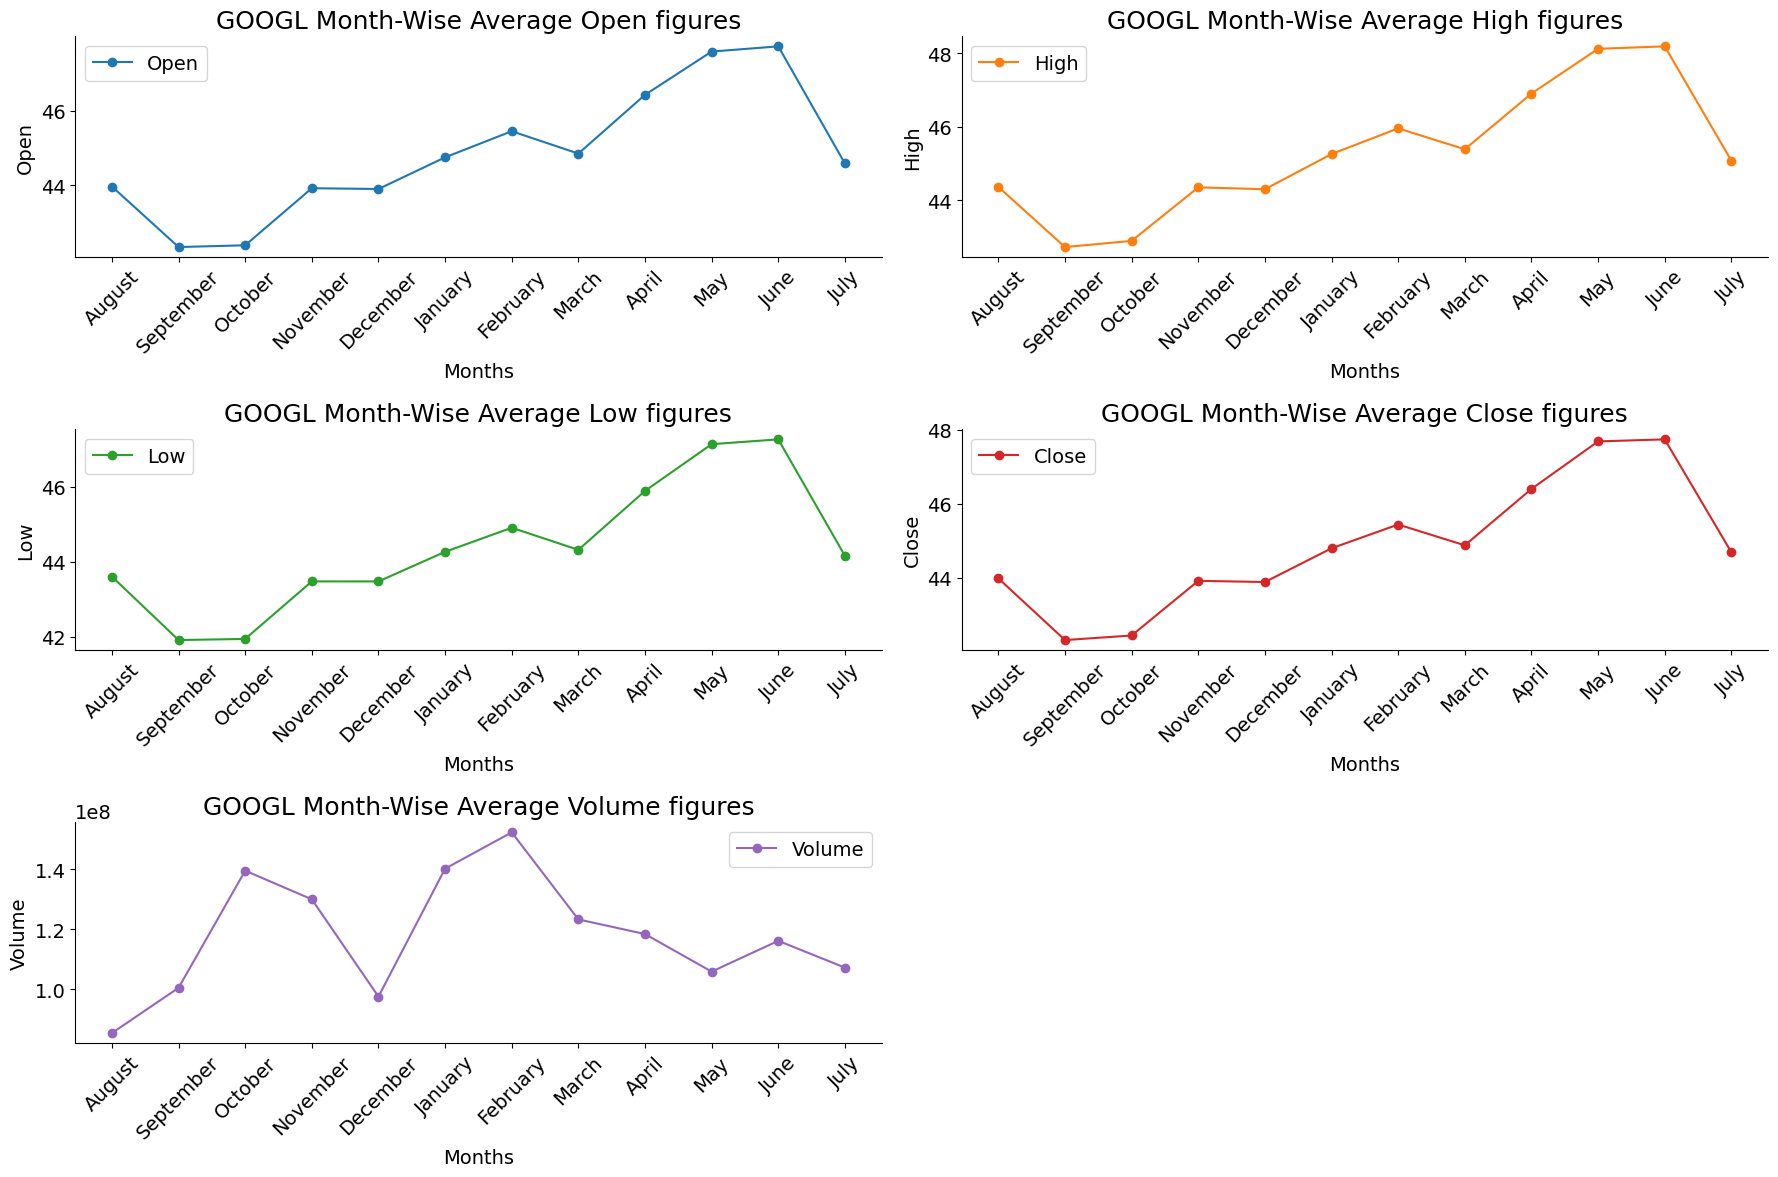

In [8]:
colors = plt.rcParams["axes.prop_cycle"]()
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot df

#Set the figure size of the plot
fig = plt.figure(figsize=(18,12))

n = len(df.groupby(df['Date'].dt.month_name(), sort=False).mean().columns[1:-2])

#Loop through the each column in the dataframe to generate a subplot
for i in range(1,n+1):
    color = next(colors)["color"]
    #Generate a subplot with the given dimensions
    plt.subplot(a, b, c)
    #Plot the data in a line graph, with different colors for each line
    plt.plot(df.groupby(df['Date'].dt.month_name(), sort=False).mean().iloc[:, i], color= color, marker='o')
    #Remove the top and right borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Rotate the x-tick labels by 45 degrees
    plt.xticks(rotation=45)
    #Set the title, x-axis label, y-axis label, and legend
    plt.title(f"{symbol} Month-Wise Average {df.groupby(df['Date'].dt.month_name(), sort=False).mean().iloc[:, i].name} figures", fontsize=18)
    plt.xlabel('Months')
    plt.ylabel(df.groupby(df['Date'].dt.month_name(), sort=False).mean().iloc[:, i].name)
    plt.legend([df.groupby(df['Date'].dt.month_name(), sort=False).mean().iloc[:, i].name])
    #Increment the subplot df
    c = c + 1

#Adjust the layout of the plot
plt.tight_layout()
#Show the plot
plt.show()

**INSIGHTS**

- Open, High, Low and close figures reach the maximum values around June month.
- Volume Avge Figures reach the max figures between January and February.

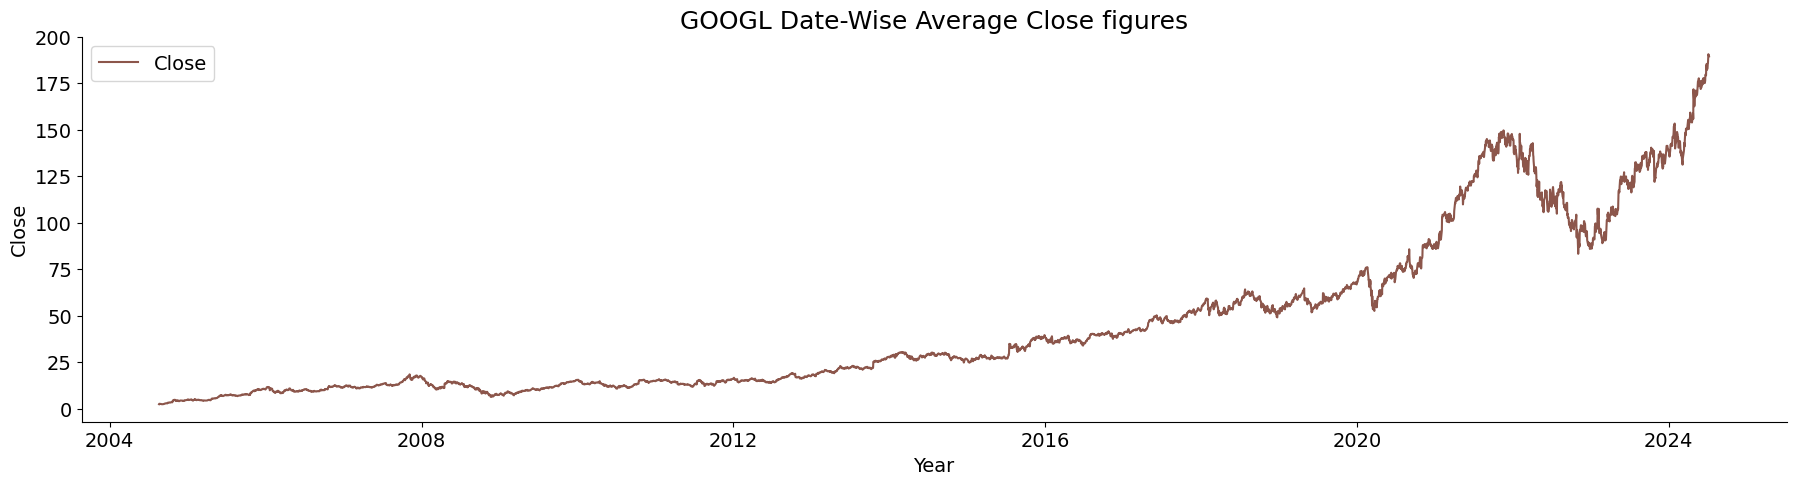

In [9]:
plt.plot(df.groupby(df['Date'], sort=False).mean().Close, color= next(colors)["color"])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#Rotate the x-tick labels by 45 degrees
plt.xticks(rotation=0)
#Set the title, x-axis label, y-axis label, and legend
plt.title(f"{symbol} Date-Wise Average Close figures", fontsize=18)
plt.xlabel('Year')
plt.ylabel('Close')
plt.legend(['Close'])
plt.show()

**INSIGHTS**

- There is an upward trend in the price of Google which is definitely a good sign for the company and it's shareholders.

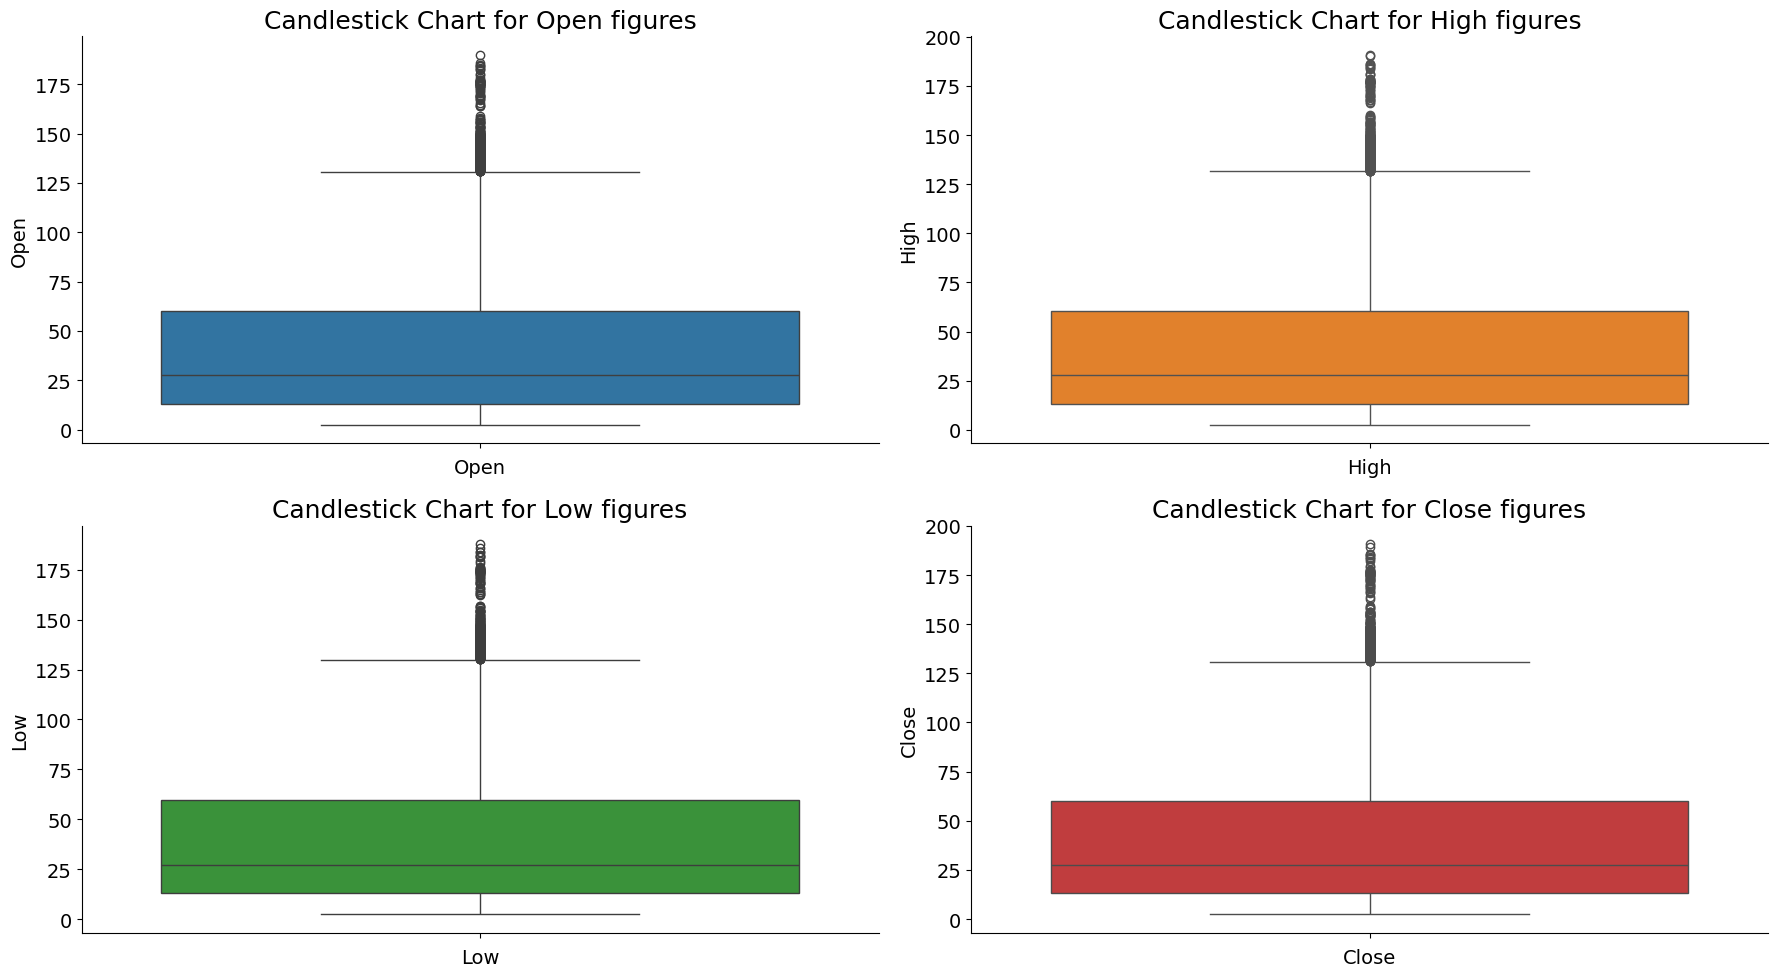

In [10]:
# This code plots boxplots of various columns in a dataframe, data_hist.

colors = plt.rcParams["axes.prop_cycle"]()

# The number of rows, columns, and the subplot counter are initialized. 
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

# A figure is initialized  
fig = plt.figure(figsize=(18,10))

length = range(1,len(df.columns[:-3]))

#loop is used to iterate over the columns of dataframe. 
for i in length:
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    #For each column, a boxplot is plotted and labels and titles are set accordingly. 
    sns.boxplot(df[df.columns[i]], color= color )
    # The spines of each plot are made invisible and the figure is adjusted and shown.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #X Axis label is added
    plt.xlabel(df.columns[i])
    #title to the plot is added
    plt.title(f'Candlestick Chart for {df.columns[i]} figures', fontsize=18)
    c = c + 1

#Layout is tightended up
plt.tight_layout()

#plot is displayed
plt.show()

## ARMA 


### Auto-Regressive (AR)

- A Statistical model that tries to predict the values based on lagged values and the lag could be chosen as per the wish.

- The AR part of the model involves regressing the variable on its own lagged (past) values. The order of the AR part is denoted by `p`

- **For Example**: Sales of 9th month could be predicted based on 7th and 8th Month.


The AR part of the model is calculated by the below formula:-

**Formula:**
$$ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \phi_3 X_{t-3} + \cdots + \phi_p X_{t-p} + \epsilon_t $$

Where:
- $ X_t $ is the value of the series at time $ t $.
- $ c $ is the constant term (intercept).
- $ \phi_i $ (for $ i = 1, 2, \ldots, p $) are the coefficients (calculated using OLS method) of the lagged values.
- $ X_{t-i} $ are the lagged values of the series.
- $ \epsilon_t $ is the error term (white noise) at time $ t $.


For example, for an AR(2) model (where $ p = 2 $), the equation would be:

$$ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \epsilon_t $$

This explicitly shows that $ X_t $ depends on the two most recent past values of the series, $ X_{t-1} $ and $ X_{t-2} $. Similarly, for an AR(n) model (where p = infinity ), the equation would be:

$$ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + ..... + \phi_n X_{t-n}\epsilon_t $$

In [11]:
#shifting the data by 1 and 2 rows, shifting would mean pushing the data n rows forward
df['Close_Lag_1'], df['Close_Lag_2'] = df['Close'].shift(1), df['Close'].shift(2)

In [12]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_Lag_1,Close_Lag_2
0,2004-08-19,2.499634,2.601119,2.398648,2.508132,893181924,0.0,0.0,NaN,NaN
1,2004-08-20,2.524880,2.726600,2.512132,2.707353,456686856,0.0,0.0,2.508132,NaN
2,2004-08-23,2.768345,2.836584,2.725851,2.734599,365122512,0.0,0.0,2.707353,2.508132
3,2004-08-24,2.780593,2.789591,2.588871,2.621365,304946748,0.0,0.0,2.734599,2.707353
4,2004-08-25,2.623616,2.699605,2.596620,2.649612,183772044,0.0,0.0,2.621365,2.734599


In [13]:
df.dropna(inplace=True)

In [14]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_Lag_1,Close_Lag_2
2,2004-08-23,2.768345,2.836584,2.725851,2.734599,365122512,0.0,0.0,2.707353,2.508132
3,2004-08-24,2.780593,2.789591,2.588871,2.621365,304946748,0.0,0.0,2.734599,2.707353
4,2004-08-25,2.623616,2.699605,2.596620,2.649612,183772044,0.0,0.0,2.621365,2.734599
5,2004-08-26,2.623365,2.698354,2.616117,2.697354,141897960,0.0,0.0,2.649612,2.621365
6,2004-08-27,2.702104,2.715102,2.641863,2.653361,124235640,0.0,0.0,2.697354,2.649612


In [19]:
df_lagged = df[['Close','Close_Lag_1', 'Close_Lag_2']]

X = df_lagged[['Close_Lag_1', 'Close_Lag_2']]
X['Intercept'] = 1
y = df_lagged['Close']

# Use numpy's least squares to estimate parameters
params = np.linalg.lstsq(X, y, rcond=None)[0]
phi_1, phi_2, c = params[0], params[1], params[2]

print(f"Estimated parameters: c = {c:.4f}, phi_1 = {phi_1:.4f}, phi_2 = {phi_2:.4f}")

# Step 4: Predict future values
def predict_ar2(X_t_minus_1, X_t_minus_2, c, phi_1, phi_2):
    return c + phi_1 * X_t_minus_1 + phi_2 * X_t_minus_2

# Predict the next value in the series
X_t_minus_1 = df['Close'].iloc[-3]
X_t_minus_2 = df['Close'].iloc[-2]
X_t_pred = predict_ar2(X_t_minus_1, X_t_minus_2, c, phi_1, phi_2)

print("Predicted next value: X_t_pred" , round(X_t_pred,4))

Estimated parameters: c = 0.0040, phi_1 = 0.9459, phi_2 = 0.0549
Predicted next value: X_t_pred 186.2331


In [20]:
#Coefficient for lags (first 2, third is constant term) calculated using ordinary least squares implemented in Numpy
params

array([0.94590329, 0.0548866 , 0.00399622])

So the values here 0.94590329, 0.0548866 are the coefficient of lags (2 here) which then gets multiplied by the lagged value of the series and gets summed up (add an random error too) to get the value at the current time stamp.

### Does Changing the Lag Order in the AR Model affect the results?

Yes, changing the order of the lags in the autoregressive model equation will impact the final result. This is because the coefficients $ \phi_i $ in an AR model are specifically tied to particular lagged values of the time series, representing their respective influences on the current value $ X_t $.

In an AR(p) model, each coefficient $ \phi_i $ is associated with a specific lag. The model captures the relationship between $ X_t $ and its past values:

$$ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + \epsilon_t $$

If you change the order of the lags, such as $ X_t = c + \phi_1 X_{t-2} + \phi_2 X_{t-3} + \phi_3 X_{t-1} + \cdots + \phi_p X_{t-p} + \epsilon_t $ you are altering which lagged value is associated with which coefficient. This means:

1. **Different Relationships**: The model will now capture different relationships between $ X_t $ and its past values. For example, $ \phi_1 $ will now be the coefficient for $ X_{t-2} $ instead of $ X_{t-1} $.
2. **Estimation Changes**: When you estimate the parameters using a method like ordinary least squares, the estimated coefficients will change because the input data (lagged values) for each coefficient has changed.
3. **Prediction Impact**: The predictive capability of the model will be different because the model is now using different past values to make predictions about the future.

Talking about the lags, there are 2 functions that we should discuss at this point in time which are ACF and PACF.

## Autocorrelation Function (ACF)

### What is ACF?

The Autocorrelation Function (ACF) helps us understand how current values of a time series are related to its past values. Think of it as a measure of how much past values influence the current value.

### Why is ACF Important?

- It helps us identify patterns in the data.
- It’s used to determine the number of Moving Average (MA) `q` terms in an ARIMA model.

### Example

Imagine you have a series of daily temperatures. The ACF will tell you if today’s temperature is related to yesterday’s temperature, the temperature two days ago, and so on.

### How to Read an ACF Plot

- The x-axis represents the lag (how far back you look).
- The y-axis represents the correlation (how strong the relationship is).
- A significant spike at lag k suggests that the value k days ago has a strong relationship with today’s value.

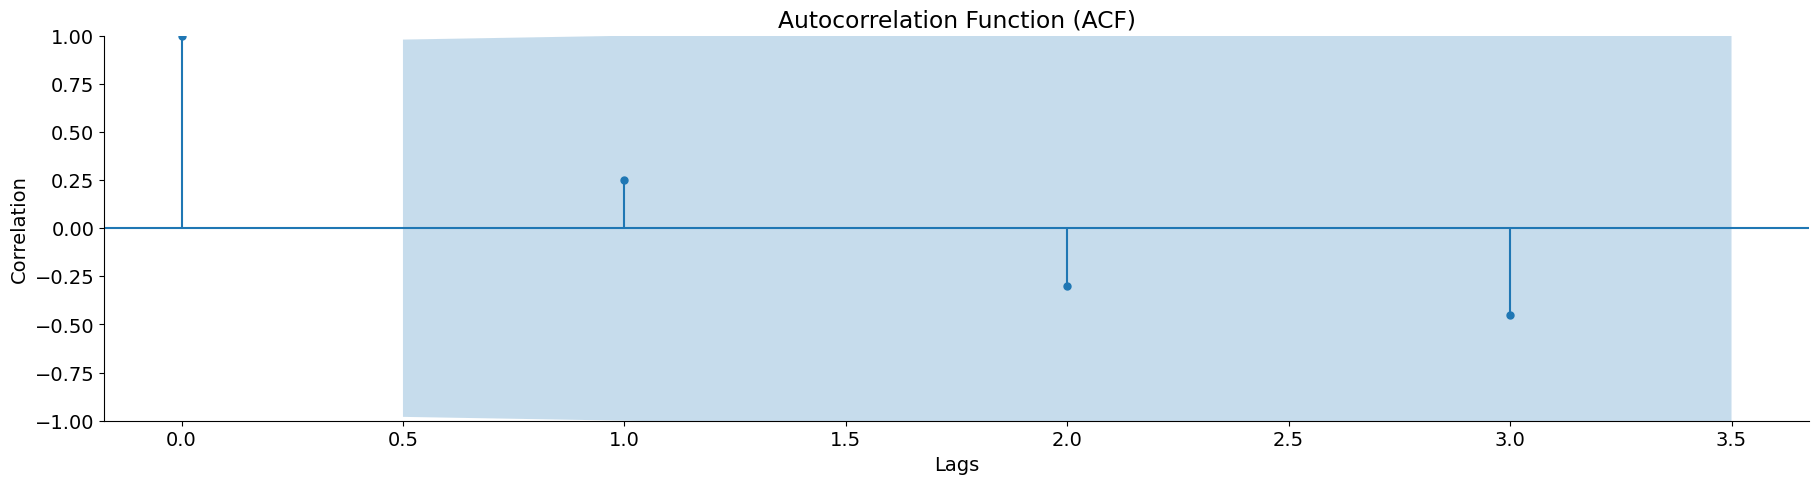

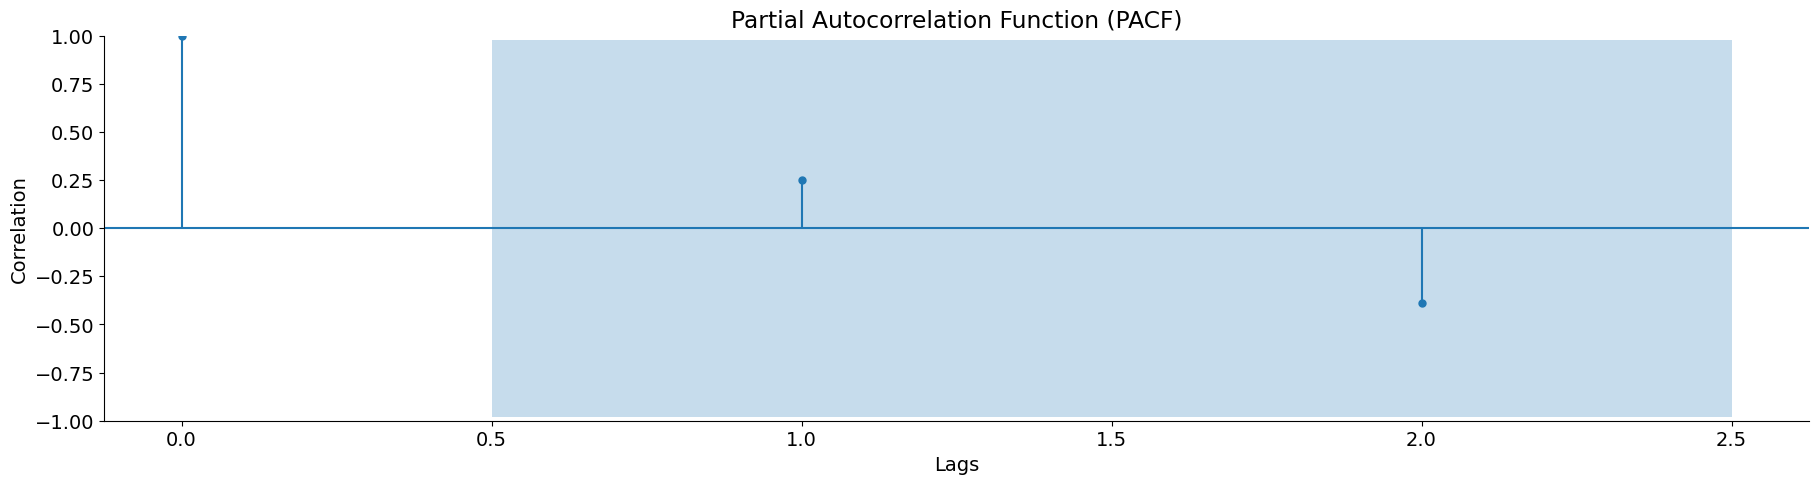

In [47]:
# Example data
data = [10, 20, 30, 40]
series = pd.Series(data)

# Plot ACF
plot_acf(series, lags=3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#Rotate the x-tick labels by 45 degrees
plt.xticks(rotation=0)
#Set the title, x-axis label, y-axis label, and legend
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(series, lags=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#Rotate the x-tick labels by 45 degrees
plt.xticks(rotation=0)
#Set the title, x-axis label, y-axis label, and legend
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()
plt.savefig('example_plot.png')

In [32]:
from statsmodels.tsa.stattools import acf
acf_values = acf(df['Close'], nlags=len(data)-1)

# Print ACF values
print("ACF Values:", acf_values)

ACF Values: [1.         0.99837588 0.9967701  0.99524611]


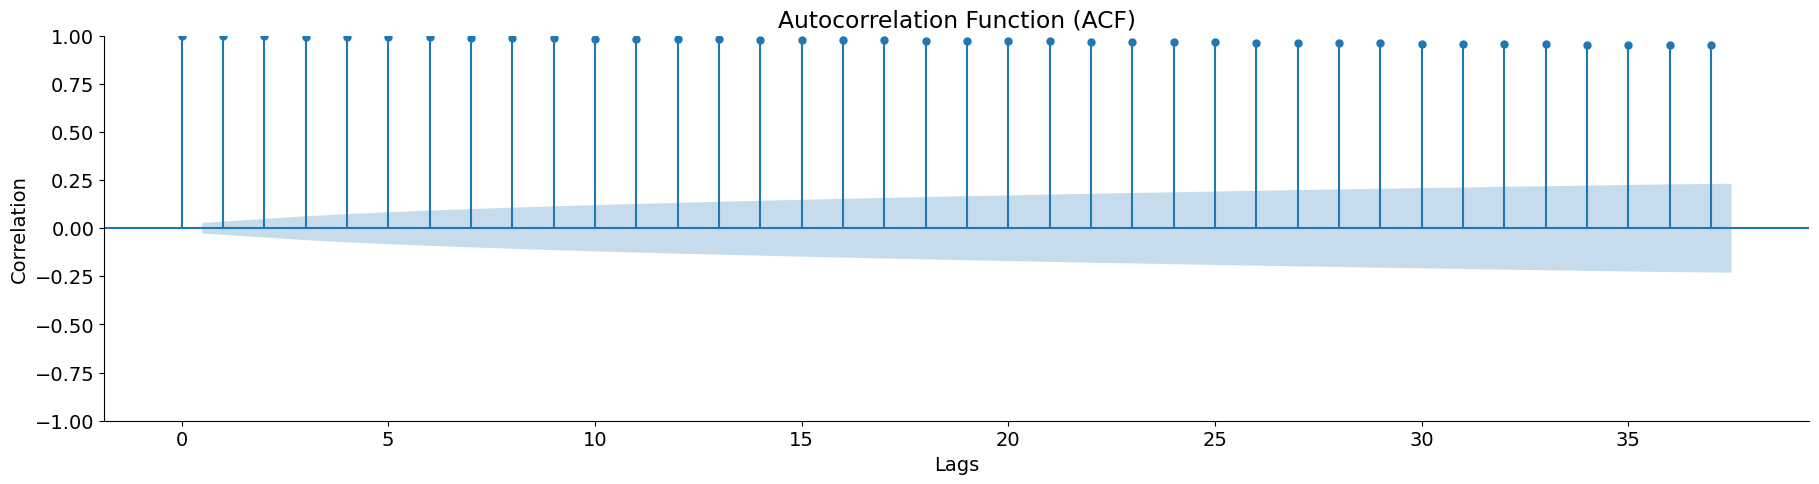

In [53]:
plot_acf(df['Close']) #acf tells q (MA)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#Rotate the x-tick labels by 45 degrees
plt.xticks(rotation=0)
#Set the title, x-axis label, y-axis label, and legend
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

## Partial Autocorrelation Function (PACF)

### What is PACF?

The Partial Autocorrelation Function (PACF) measures the correlation between the time series and its lagged values, but it removes the effects of the intermediate lags. It’s like filtering out the middle steps to see the direct relationship.

### Why is PACF Important?

- It helps us determine the number of Autoregressive (AR) `p` terms in an ARIMA model.

### Example

Using the same daily temperature example, the PACF will show the direct relationship between today’s temperature and the temperature two days ago, without being influenced by yesterday’s temperature.

### How to Read a PACF Plot

- The x-axis represents the lag.
- The y-axis represents the partial correlation.
- A significant spike at lag k suggests that the value k days ago has a direct relationship with today’s value, independent of the values in between.

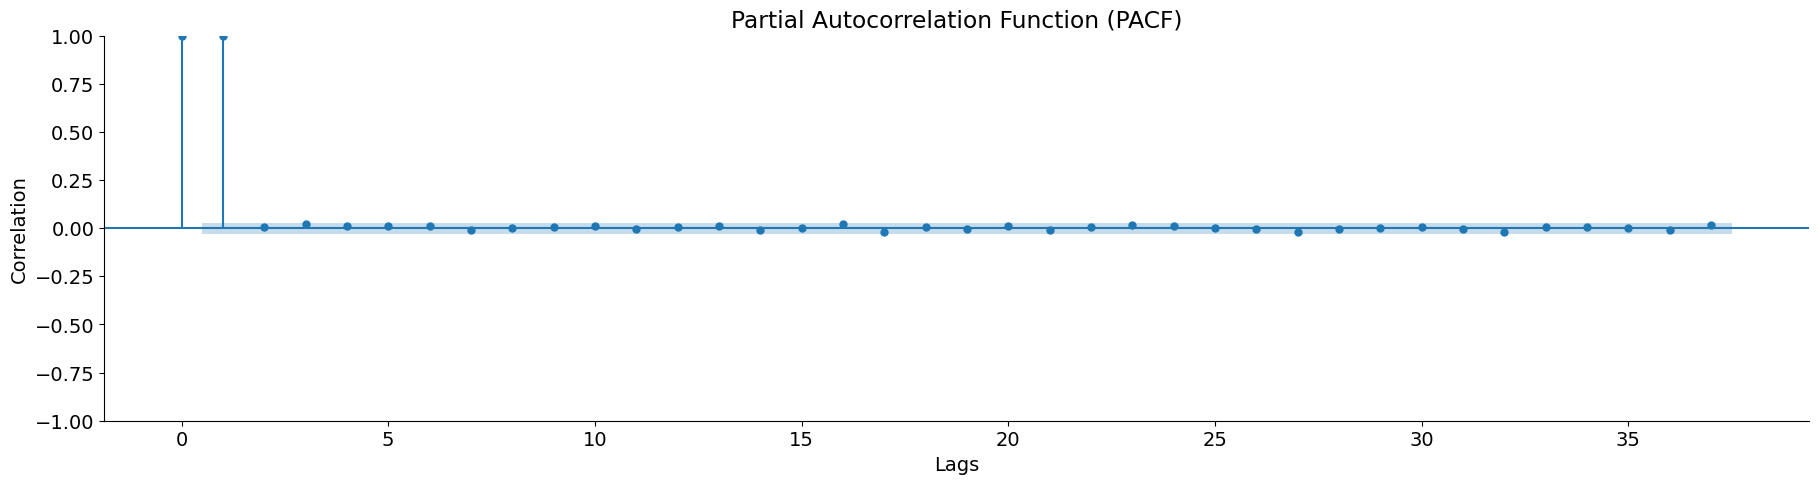

In [48]:
plot_pacf(df['Close']) #pacf tells p (AR)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#Rotate the x-tick labels by 45 degrees
plt.xticks(rotation=0)
#Set the title, x-axis label, y-axis label, and legend
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

Now if we were to get the lags here is what we would do:-

1. Take a look at the correlation values. Starting from the left stop where the correlation value is less than 0.05 (5% significance)
2. In this case the series has a high significance value of the lag at first lag and hence we will take lag = 1
3. We didn't take 2nd lag because its statistically insignificant.

In [33]:
from statsmodels.tsa.stattools import pacf
pacf_values = pacf(df['Close'], nlags=len(data)-1)

# Print ACF values
print("PACF Values:", pacf_values)

PACF Values: [1.         0.99857551 0.00553421 0.02788366]


## How to Use ACF and PACF for ARIMA Modeling

1. **Identify AR Order (p)**:
   - Look at the PACF plot.
   - Find where the PACF cuts off (suddenly drops to near zero) – this lag is the AR order (p).

2. **Identify MA Order (q)**:
   - Look at the ACF plot.
   - Find where the ACF cuts off – this lag is the MA order (q).

3. **Identify Differencing Order (d)**:
   - Check if your time series is stationary (its statistical properties do not change over time).
   - If not, determine how many times you need to difference the data to make it stationary.

### Conclusion

- **ACF** helps you see how past values influence the current value.
- **PACF** helps you see the direct relationship between past values and the current value, filtering out the middle steps.
- Together, ACF and PACF help you decide the parameters for your ARIMA model.